In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xg 
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[10,5]

In [2]:
pwd

'C:\\Users\\midhu\\Desktop\\Midhun\\freelance\\ML_usecases\\Kishore\\agriculture_yield_prediction\\notebook'

In [3]:
train=pd.read_csv('../data/agricultural_yield_train.csv')
train.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,96.415657,1,147.853040,94.593926,444.267569,3,683.759119
1,92.352626,0,281.565396,90.504644,517.585491,7,678.714861
2,63.714785,1,137.864940,97.329340,420.310945,8,934.691975
3,90.084256,1,100.946659,113.404828,547.817646,7,905.842541
4,81.600341,1,223.088908,83.048176,434.726333,6,897.584665


In [22]:
train.isnull().sum()

Soil_Quality                        0
Seed_Variety                        0
Fertilizer_Amount_kg_per_hectare    0
Sunny_Days                          0
Rainfall_mm                         0
Irrigation_Schedule                 0
Yield_kg_per_hectare                0
dtype: int64

In [4]:
train.shape

(16000, 7)

In [5]:
test=pd.read_csv('../data/agricultural_yield_test.csv')
test.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [6]:
test.shape

(4000, 7)

In [7]:
ytrain=train['Yield_kg_per_hectare']
xtrain=train.drop('Yield_kg_per_hectare',axis=1)

In [8]:
ytest=test['Yield_kg_per_hectare']
xtest=test.drop('Yield_kg_per_hectare',axis=1)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [10]:
rf=RandomForestRegressor()
rf_model=rf.fit(xtrain,ytrain)
rf_model

RandomForestRegressor()

In [11]:
ypred = rf_model.predict(xtest)
ypred

array([321.38571505, 881.18717237, 776.37671725, ..., 760.16518471,
       533.35101097, 319.83275782])

In [12]:
r2_score(ytest,ypred)

0.9243599230433722

In [13]:
xgb_r = xg.XGBRegressor(n_estimators = 10, seed = 123)

In [15]:
xgb_r.fit(xtrain,ytrain) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
ypred = xgb_r.predict(xtest)
ypred

array([343.65207, 908.21893, 778.8097 , ..., 775.62445, 551.8508 ,
       334.43686], dtype=float32)

In [17]:
r2_score(ytest,ypred)

0.9206853592306048

Text(0, 0.5, 'Values')

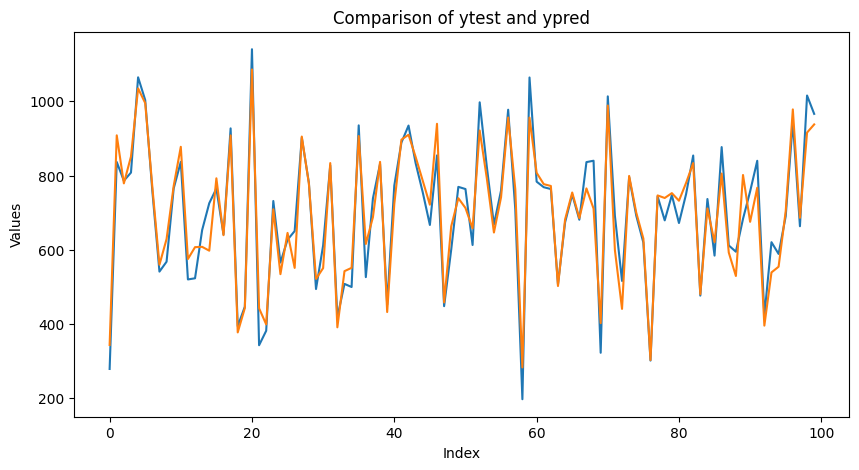

In [20]:
# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(ytest[:100], label='ytest')
plt.plot(ypred[:100], label='ypred')

# Adding titles and labels
plt.title('Comparison of ytest and ypred')
plt.xlabel('Index')
plt.ylabel('Values')